# DSCI 100 Group 177 - Group Project Proposal

### Title: [placeholder]

### Introduction:

[placeholder]

### Preliminary exploratory data analysis:

[placeholder]

In [47]:
# install.packages("gridExtra")

library(tidyverse)
library(RColorBrewer)
# library(gridExtra)

In [48]:
tennis_data <- read_csv("https://raw.githubusercontent.com/ben-westmore/dsci-100-2022w1-group-177/main/atp2017-2019.csv") |>
    mutate(round = as_factor(round),
           tourney_year = as.double(substr(tourney_date, 1, 4)),
           tourney_month = as.double(substr(tourney_date, 5, 6)),
           tourney_day = as.double(substr(tourney_date, 7, 8))) |>
    filter(round != 'BR',
           round != 'RR',
           tourney_year == 2019) |>
    select(-tourney_date)

tennis_data <- tennis_data[, c(1:6, 50:52, 7:49)]    

head(tennis_data)
glimpse(tennis_data)

tennis_data$round <- factor(tennis_data$round, levels = c("F", "SF", "QF", "R16", "R32", "R64", "R128"))
levels(tennis_data$round)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_year,tourney_month,tourney_day,match_num,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,2019-0301,Auckland,Hard,32,A,2019,1,7,300,⋯,39,23,11,9,8,12,63,814,93,616
86,2019-0301,Auckland,Hard,32,A,2019,1,7,299,⋯,61,45,13,15,7,10,93,616,58,855
87,2019-0301,Auckland,Hard,32,A,2019,1,7,298,⋯,36,24,10,9,5,8,63,814,34,1125
88,2019-0301,Auckland,Hard,32,A,2019,1,7,297,⋯,52,36,13,10,4,5,93,616,50,933
89,2019-0301,Auckland,Hard,32,A,2019,1,7,296,⋯,104,72,23,18,13,15,58,855,24,1705
90,2019-0301,Auckland,Hard,32,A,2019,1,7,295,⋯,40,27,18,10,6,7,63,814,54,895


Rows: 2,357
Columns: 52
$ ...1               <dbl> 85, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99,…
$ tourney_id         <chr> "2019-0301", "2019-0301", "2019-0301", "2019-0301",…
$ tourney_name       <chr> "Auckland", "Auckland", "Auckland", "Auckland", "Au…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_year       <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 201…
$ tourney_month      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ tourney_day        <dbl> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 289, 2…
$ winner_id          <dbl> 105815, 111815, 105815, 111815, 105526, 105815, 104…
$ winner_seed        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "2"…
$ winner_entry  

[1] "F"    "SF"   "QF"   "R16"  "R32"  "R64"  "R128"

round,number_of_matches
<fct>,<int>
F,61
SF,123
QF,235
R16,466
R32,801
R64,370
R128,301


Warning message:
“Removed 198 rows containing missing values (geom_point).”


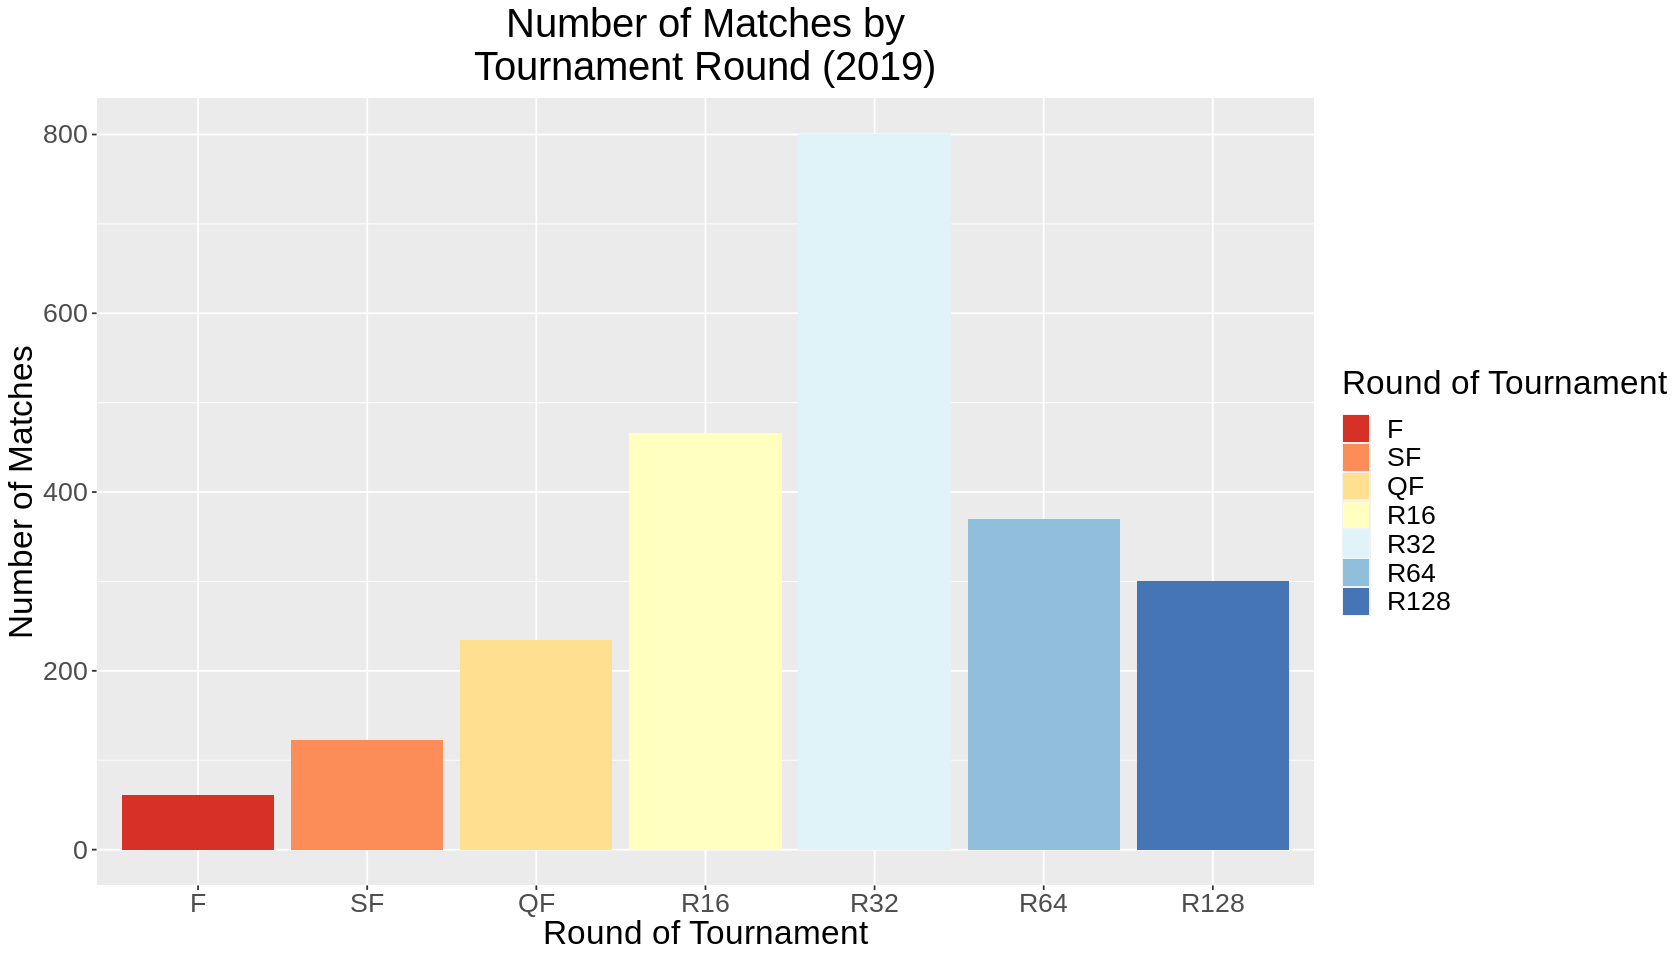

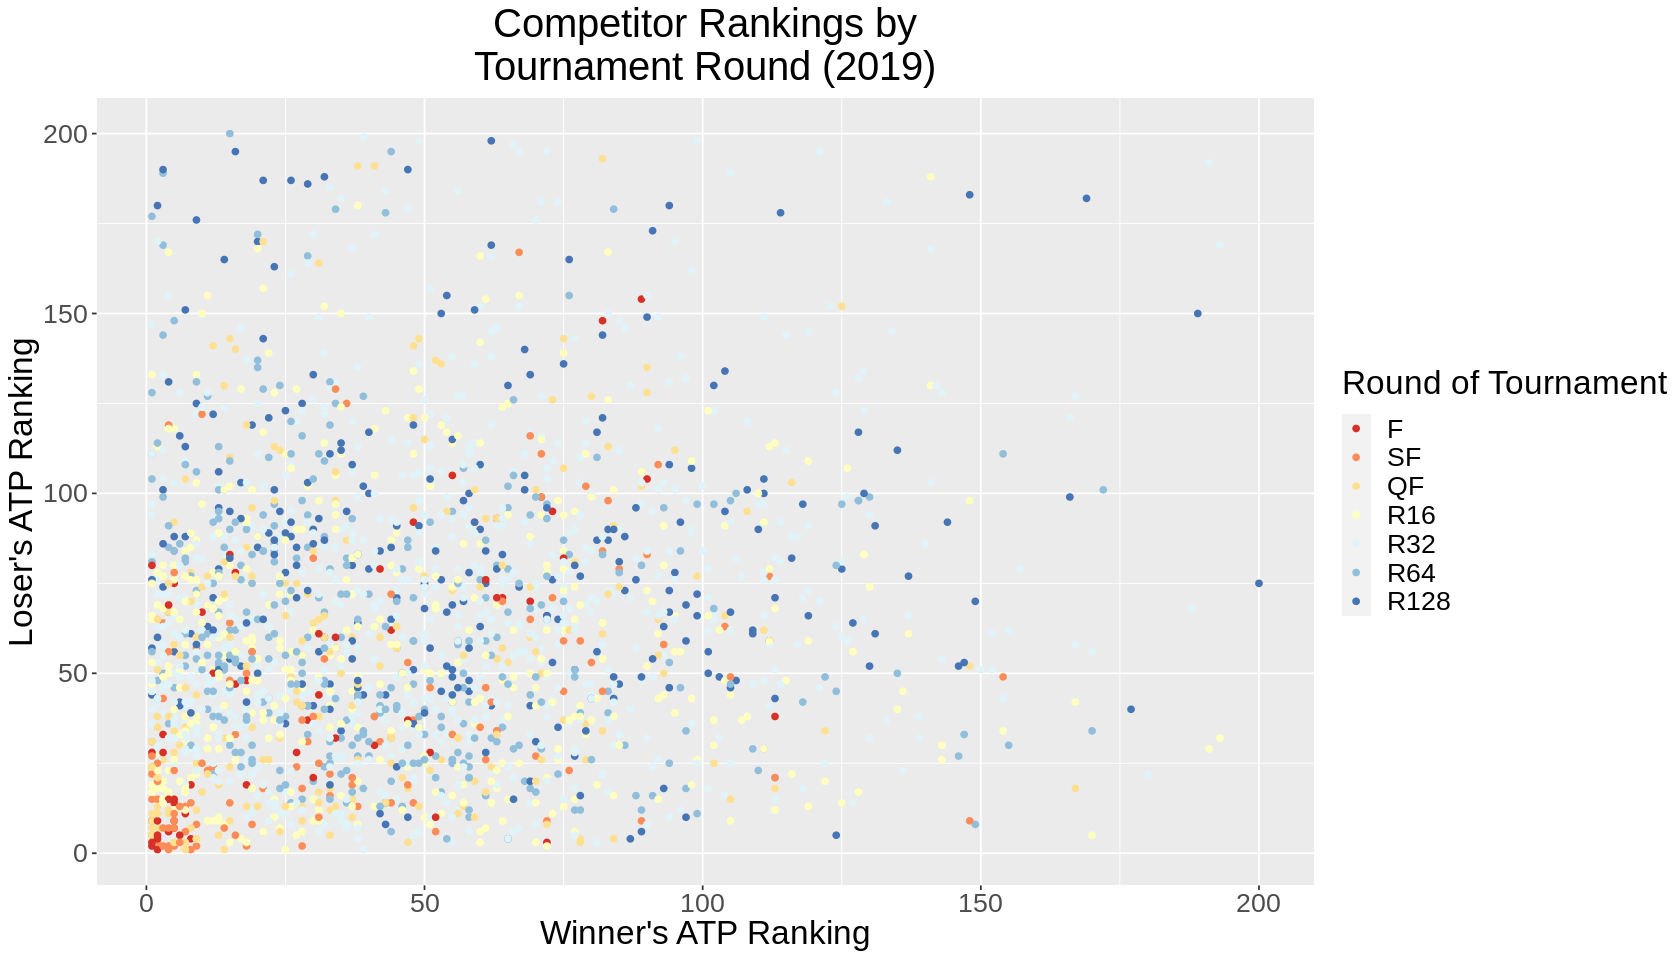

In [49]:
# display.brewer.all(colorblindFriendly = TRUE)
options(repr.plot.width = 14, repr.plot.height = 8)

matches_by_round <- tennis_data |>
    group_by(round) |>
    summarize(number_of_matches = n())

matches_by_round

matches_by_round_plot <- ggplot(matches_by_round, aes(x = round, y = number_of_matches, fill = round)) +
    geom_bar(stat = "identity") +
    labs(title = "Number of Matches by\nTournament Round (2019)",
         x = "Round of Tournament",
         y = "Number of Matches",
         fill = "Round of Tournament") +
    scale_fill_brewer(palette = "RdYlBu") +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

matches_by_round_plot

rankings_vs_round_plot <- ggplot(tennis_data, aes(x = winner_rank, y = loser_rank, colour = round)) +
    geom_point() +
    labs(title = "Competitor Rankings by\nTournament Round (2019)",
         x = "Winner's ATP Ranking",
         y = "Loser's ATP Ranking",
         colour = "Round of Tournament") +
    lims(x = c(1, 200), y = c(1, 200)) +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5)) +
    scale_color_brewer(palette = "RdYlBu")

rankings_vs_round_plot

# grid.arrange(matches_by_round_plot, rankings_vs_round_plot, ncol = 2)

### Methods:

[placeholder]

### Expected outcome and significance:

[placeholder]